<a href="https://colab.research.google.com/github/BhanuPShahi/TED-talk-views-prediction/blob/main/Ted_Talk_Views_Prediction_Bhanu_P_Shahi_17_05_2021_%5BTeam_2%5D_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ted Talk Views Prediction**

###TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

###**The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.**

##**Importing Libraries**

In [85]:
pip install fast_ml

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from skopt import BayesSearchCV
# from skopt.space import Real, Categorical, Integer
from sklearn import ensemble

import warnings
warnings.filterwarnings('ignore')

##**Loading the dataset**

In [93]:
#loading the data file and creating a dataframe
path='/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Capstone Projects/Ted Talk Views Prediction/data_ted_talks.csv'
df=pd.read_csv(path)

In [94]:
df.shape

(4005, 19)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [96]:
df.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."


**Checking for null values**

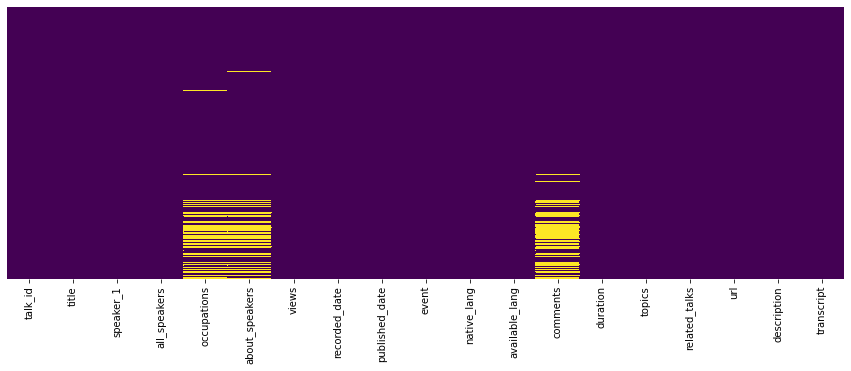

In [97]:
#checking the missing data in the dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.rcParams['figure.figsize'] = (15, 5)

In [98]:
df.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

### Here, we have only 3 numerical columns in our dataset out of which 1 is our target variable and 2 can be used as features and rest all columns are either categorical or they acontains textual data.
### So, our main goal here is to find or generate some numerical columns from these columns.

In [99]:
type(df['available_lang'][0])

str

In [100]:
type(df['topics'][0])

str

**Let's add a new feature which contain the count of total no of language for a particular video.**

In [113]:
df['available_lang'] = df.apply(lambda row: eval(row['available_lang']), axis=1)

In [114]:
df['num_of_lang'] = df.apply(lambda x: len(x['available_lang']), axis=1)

**Let's add a new feature which contain the count of total no of topics for a particular video.**

In [115]:
df['topics'] = df.apply(lambda row: eval(row['topics']), axis=1)

In [116]:
df['num_of_tags'] = df.apply(lambda x: len(x['topics']), axis=1)

In [117]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'num_of_lang',
       'num_of_tags'],
      dtype='object')

In [118]:
# df[df['recorded_date'].isna()]

In [119]:
# def date
d=df['recorded_date'][0]
date=pd.to_datetime(d).date()
print(date)

2006-02-25


###**Let's explore native_lang column**

In [120]:
df['native_lang'].value_counts()

en       3957
es         27
fr          9
ja          3
hi          2
zh-cn       1
pt          1
ko          1
ar          1
pt-br       1
de          1
it          1
Name: native_lang, dtype: int64

* **We have almost 99 % of native_lang as english so this column would not affect much to our model**

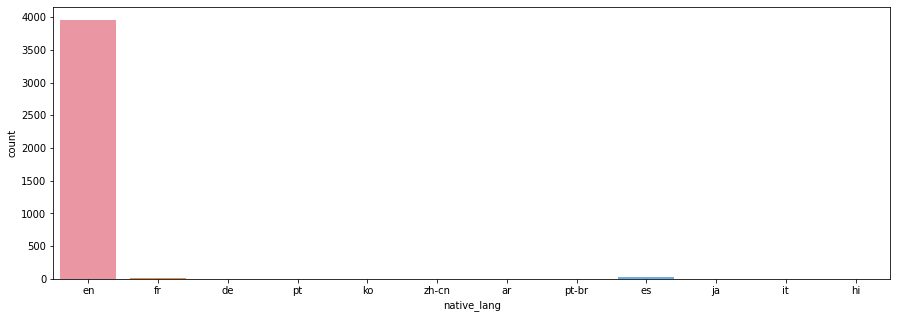

In [121]:
sns.countplot(df['native_lang'])

For now we can add some numerical columns like no 

In [122]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'num_of_lang',
       'num_of_tags'],
      dtype='object')

In [130]:
num_df=df[['views','comments','duration','num_of_lang','num_of_tags']]

In [ ]:
# from fast_ml.tools import EDA
# eda_report=EDA.generate_report(num_df, target='views', model_type='rig')
# eda_report.show()

###Let's explore some numerical features

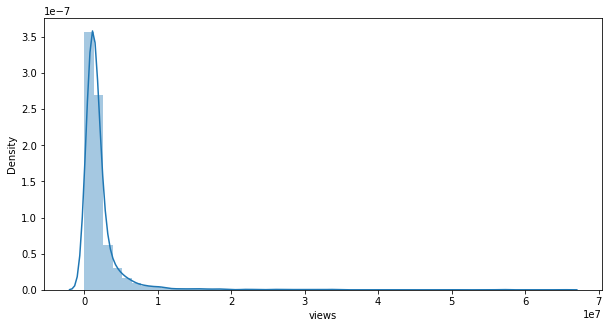

In [131]:
plt.figure(figsize=(10,5))
sns.distplot(num_df['views'])

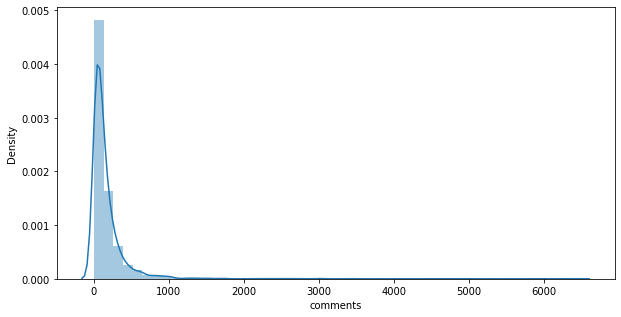

In [132]:
plt.figure(figsize=(10,5))
sns.distplot(num_df['comments'])

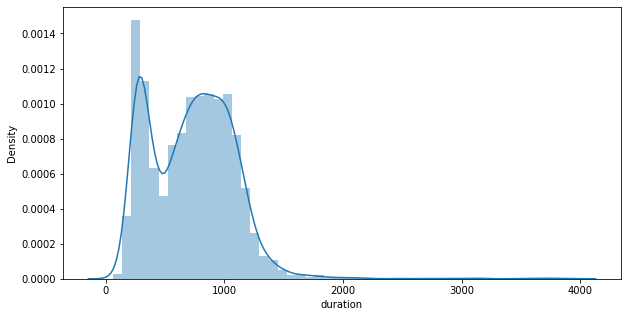

In [133]:
plt.figure(figsize=(10,5))
sns.distplot(num_df['duration'])

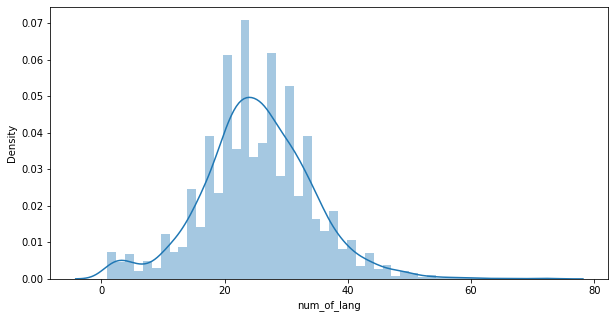

In [134]:
plt.figure(figsize=(10,5))
sns.distplot(num_df['num_of_lang'])

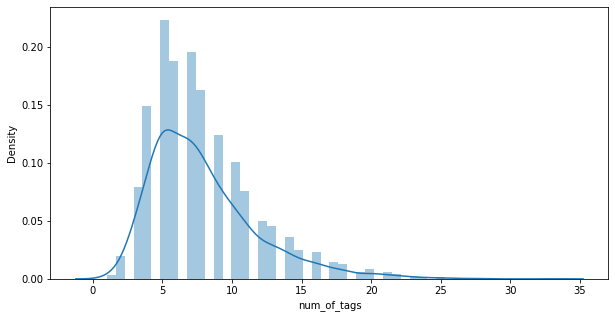

In [135]:
plt.figure(figsize=(10,5))
sns.distplot(num_df['num_of_tags'])

In [136]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'num_of_lang',
       'num_of_tags'],
      dtype='object')

In [139]:
df['all_speakers'][9]

"{0: 'Jehane Noujaim'}"

In [140]:
df['occupations'][4]

"{0: ['author', 'educator']}"

In [141]:
df['about_speakers'][4]

'{0: "Creativity expert Sir Ken Robinson challenges the way we\'re educating our children. He champions a radical rethink of our school systems, to cultivate creativity and acknowledge multiple types of intelligence. "}'

In [142]:
df['event'][4]

'TED2006'

In [143]:
df['related_talks'][4]

'{865: \'Bring on the learning revolution!\', 1738: "How to escape education\'s death valley", 2276: \'How to fix a broken school? Lead fearlessly, love hard\', 2182: \'How to run a company with (almost) no rules\', 2341: "Why some of us don\'t have one true calling", 9048: \'The search for "aha!" moments\'}'

In [144]:
df['description'][4]

'Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.'

In [145]:
df['transcript'][4]

'Good morning. How are you? (Audience) Good. It\'s been great, hasn\'t it? I\'ve been blown away by the whole thing. In fact, I\'m leaving. (Laughter) There have been three themes running through the conference, which are relevant to what I want to talk about. One is the extraordinary evidence of human creativity in all of the presentations that we\'ve had and in all of the people here; just the variety of it and the range of it. The second is that it\'s put us in a place where we have no idea what\'s going to happen in terms of the future. No idea how this may play out. I have an interest in education. Actually, what I find is, everybody has an interest in education. Don\'t you? I find this very interesting. If you\'re at a dinner party, and you say you work in education — actually, you\'re not often at dinner parties, frankly. (Laughter) If you work in education, you\'re not asked. (Laughter) And you\'re never asked back, curiously. That\'s strange to me. But if you are, and you say 

###We can remove the id because it isn't adding any value to the dataset.

In [147]:
df.drop(columns='talk_id',inplace= True)


In [149]:
df.isna().sum()

title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
num_of_lang         0
num_of_tags         0
dtype: int64

###Let's treat nan values of numerical columns

In [150]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer.fit(df[['duration','comments']])
df[['duration','comments']] = imputer.transform(df[['duration','comments']])

In [151]:
df[['duration','comments']].isna().sum()

duration    0
comments    0
dtype: int64

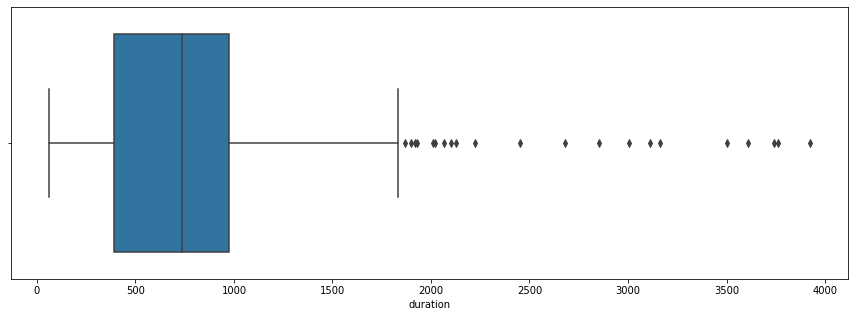

In [153]:
sns.boxplot(x=df['duration'])

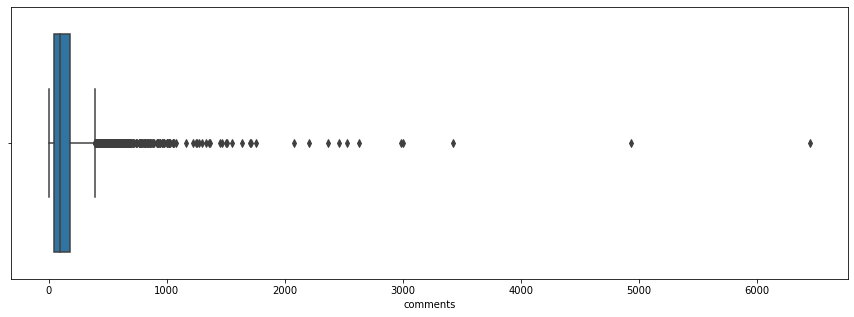

In [154]:
sns.boxplot(x=df['comments'])

We have some outliers in our numerical features.

###Let's explore published date column

In [155]:
import datetime
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [156]:
df['day'] = df['published_date'].apply(lambda x: x.weekday())
df['month']=df['published_date'].apply(lambda x: x.month)
df['year'] = df['published_date'].apply(lambda x: x.year)

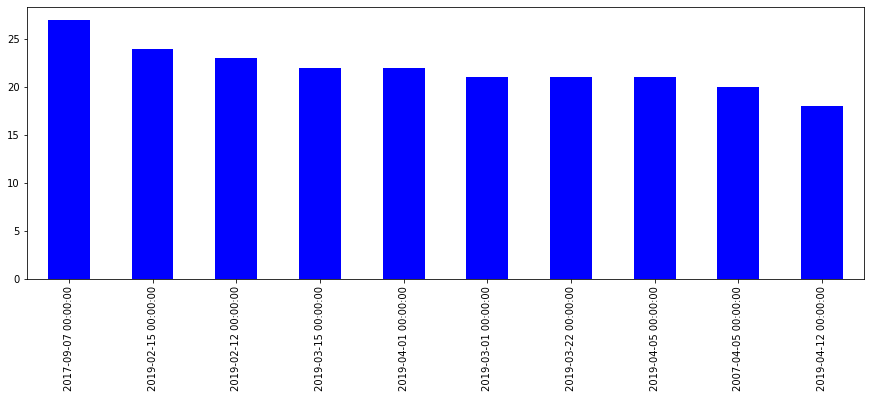

In [157]:
df['published_date'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',color='blue')

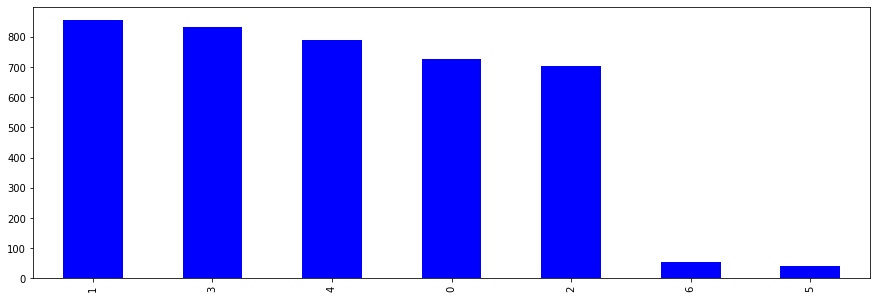

In [158]:
df['day'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',color='blue')

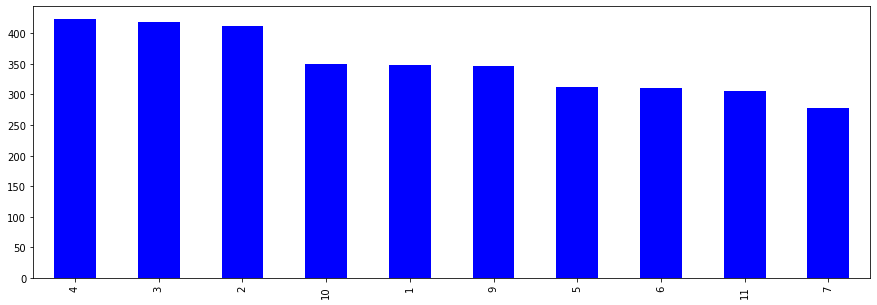

In [159]:
df['month'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',color='blue')

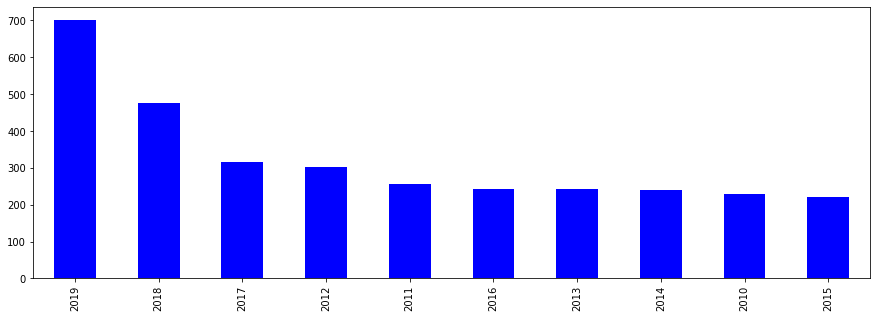

In [160]:
df['year'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',color='blue')